## Importing Libraries and Dataset

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Magic functions
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading and Displaying the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handling Missing Values

- Visualizing Null Values

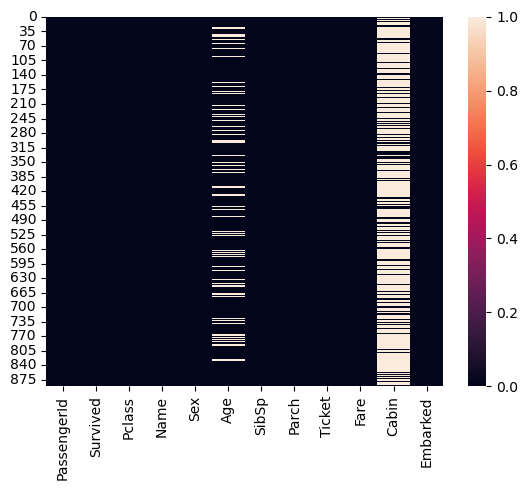

In [3]:
# Visualizing the Null values by Heatmap

sns.heatmap(df.isnull())
plt.show()

- Count of Null Values

In [4]:
# Getting the details of Null values

for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"{col} : {df[col].isnull().sum()}    i.e. {round(df[col].isnull().mean(),4)}% of the data.")

Age : 177    i.e. 0.1987% of the data.
Cabin : 687    i.e. 0.771% of the data.
Embarked : 2    i.e. 0.0022% of the data.


- Handling Null values - ***Embarked***

As there a very less count of Null values in *Embarked* so, I would consider to drop it.

In [5]:
# getting the exact Null Values for Embarked feature

df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
# Dropping the Null Values

df.dropna(subset= 'Embarked',inplace=True)
df.

- Handling Null values - ***Cabin***

  In *Cabin*, we have categorical features so, I would replace the Null values by a new value i.e. *Unknown*

In [7]:
# Replacing the Null values of Cabin feature by Unknown

df['Cabin'].fillna('Unknown',inplace=True)

- Handling Null values - ***Age***

  In *Age*, we have observed that the age of Passengers are following some pattern w.r.t. Passenger Class (Pclass). So, I would like to replace the Null values w.r.t. Pclass.

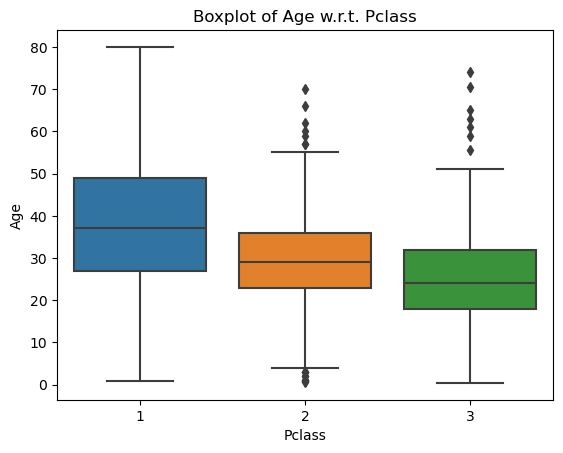

In [8]:
# Ploting a boxplot between Age and Pclass

plt.title("Boxplot of Age w.r.t. Pclass")
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

In [9]:
# Replacing null values w.r.t. Pclass

# Function to replace Null values w.r.t. Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return df[df['Pclass'] == 1]['Age'].median()
        elif Pclass == 2:
            return df[df['Pclass'] == 2]['Age'].median()
        else:
            return df[df['Pclass'] == 3]['Age'].median()
    return Age

# Calling function
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


Now, We have handled all of the Null values in our Dataset.

In [10]:
# Checking Null values

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Handling Outliers

- Visualizing Outliers

  1. Plotting Boxplot to Check the Outliers present in the data.
  2. Plotting Distplot to visualize the distribution of data in the particular feature

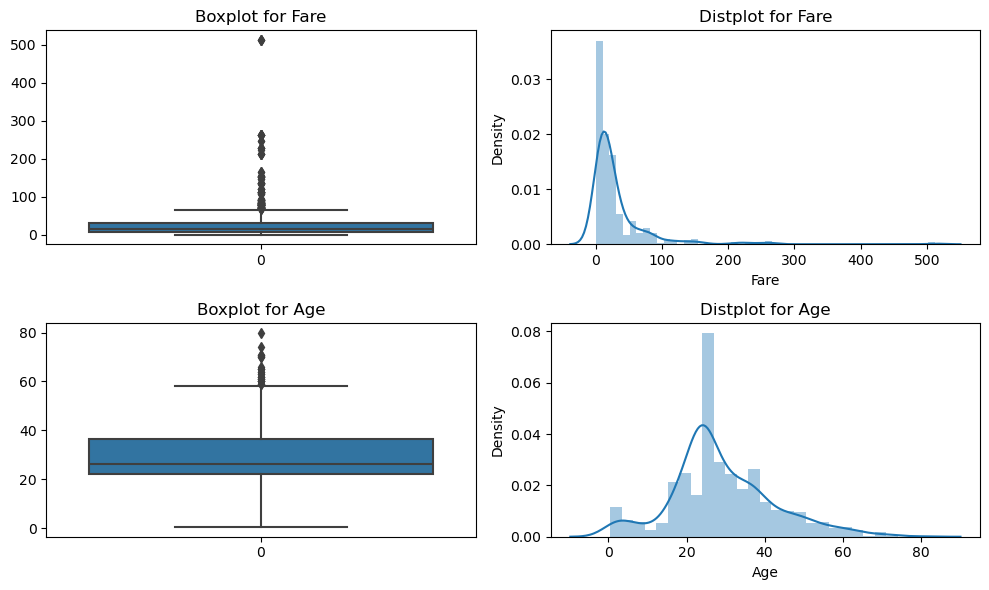

In [11]:
# Plotting Boxplot & Distplot
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.title(f"Boxplot for Fare")
sns.boxplot(df['Fare'])

plt.subplot(2,2,2)
plt.title(f"Distplot for Fare")
sns.distplot(df['Fare'])

plt.subplot(2,2,3)
plt.title(f"Boxplot for Age")
sns.boxplot(df['Age'])

plt.subplot(2,2,4)
plt.title(f"Distplot for Age")
sns.distplot(df['Age'])

plt.tight_layout()
plt.show()


- Detecting and Replacing the Outliers - ***Fare***

  As we can see, there is a Right Skewed distribution in *Fare* feature. So, I would like to go with Inter Quantile Range (IQR) method to replace the outliers by Upper Bridge or Lower Bridge values.

In [12]:
# Getting IQR  for Fare

Q1 = df.Fare.quantile(0.25)
Q3 = df.Fare.quantile(0.75)
IQR = Q3 - Q1
# Printing Quantiles values
print(f'Q1  : {Q1}')
print(f'Q3  : {Q3}')
print(f'IQR : {IQR}')

Q1  : 7.8958
Q3  : 31.0
IQR : 23.1042


In [13]:
# Creating Upper & Lower Bridge for Outliers

upper_bridge = Q3 + (1.5*IQR)
lower_bridge = Q1 - (1.5*IQR)
print(f'Upper Bridge : {upper_bridge}')
print(f'Lower Bridge : {lower_bridge}')

Upper Bridge : 65.6563
Lower Bridge : -26.7605


In [14]:
# Detecting Outliers

Outliers = df[(df.Fare > upper_bridge) | (df.Fare < lower_bridge)]
print(f"Total Outliers in Fare : {Outliers.shape[0]}")

Total Outliers in Fare : 114


In [15]:
# Replacing the Outliers by Upper & Lower Bridge Values

df['Fare'] = np.where(df['Fare'] > upper_bridge,upper_bridge,np.where(df['Fare'] < lower_bridge,lower_bridge,df['Fare']))

- Detecting and Replacing the Outliers - ***Age***

  As we can see, there is a Normal distribution in *Age* feature. So, I would like to go with Standard Deviation (Std) method to replace the outliers by Upper Bound or Lower Bound values.

In [16]:
# Calculating Upper and Lower Bound

std = df.Age.std()
mean = df.Age.mean()
upper_bound = mean + 3*std
lower_bound = mean - 3*std

print(f'Std Dev : {std}')
print('-----------------------------')
print(f'Upper Bound : {upper_bound}')
print(f'Mean        : {mean}')
print(f'Lower Bound : {lower_bound}')

Std Dev : 13.209814246765708
-----------------------------
Upper Bound : 68.64875657606765
Mean        : 29.019313835770525
Lower Bound : -10.610128904526597


In [17]:
# Detecting Outliers

Outliers = df[(df['Age']>upper_bound) | (df['Age']<lower_bound)]
print(f"Total Outliers in Age : {Outliers.shape[0]}")

Total Outliers in Age : 7


In [18]:
# Replacing all the outliers with upper and lower bound

df['Age'] = np.where(df['Age'] > upper_bound,68,df['Age'])

Now, We have handled all of the Outliers values in our Dataset.

In [19]:
# Detecting Outliers in Fare
Outliers = df[(df.Fare > upper_bridge) | (df.Fare < lower_bridge)]
print(f"Total Outliers in Fare : {Outliers.shape[0]}")

# Detecting Outliers in Age
Outliers = df[(df['Age']>upper_bound) | (df['Age']<lower_bound)]
print(f"Total Outliers in Age : {Outliers.shape[0]}")

Total Outliers in Fare : 0
Total Outliers in Age : 0


In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(889, 12)

In [22]:
df.to_csv('Titanic_Cleaned_Dataset.csv',index=False)